# Aumduc Laboratory 

This is a demonstrating how to set up a foundation network of virtual machines (vm) that can be used to improve a number of different hacking and general IT skills. The foundation network contains 3 routers and 3 pcs. Other servers and hosts, with varying operating systems, etc. can be added to the network to customize it. I'll try to follow up with tutorials on how to do this at a later date. 

<b>Note: Ubuntu 16.04 is the host operating system of the machine that is running this lab. Try all this from Windows at your own risk/frustration.</b>


## Referenced Documents

The following tutorials and sources were used to build the animated gifs. They can be consulted for additional information: 

<b>Create a vm on VirtualBox:</b>

https://docs.oracle.com/cd/E26217_01/E26796/html/qs-create-vm.html

<b>Create a Kali Linux vm on VirtualBox:</b>

https://www.youtube.com/watch?v=FVmWMogGX4Q

<b>Set up a network of virtual machines on virtual box:</b> 

http://www.brianlinkletter.com/how-to-use-virtualbox-to-emulate-a-network/

<b>Configure routers using quagga:</b> 

http://www.brianlinkletter.com/how-to-build-a-network-of-linux-routers-using-quagga/


## <center>Initial setup</center>

<b>Download .iso files of these operating systems:</b>

[Ubuntu 16.04 Server](https://www.ubuntu.com/download) 

[Ubuntu 16.04 Desktop](https://www.ubuntu.com/download)

[Kali Linux 2017.3](https://www.kali.org/downloads/)


<b>Download VirtualBox from the command line:</b>
```
sudo apt-get update
sudo apt install virtualbox
```

#### Device naming convention
Servers get Hindu names (narada, etc.)

Routers and PCs are numerical (router1, pc1, pc2, pc3, etc.). 

The Kali box is labeled as such.

tom, dick and harry are users on PCs. 

jane is user on servers and routers.

root is user on kali box.


## <center>Phase 1 - Initial configuration of base machines on VirtualBox<center>

<b>Create a virtual machine (VM) for each of the 3 operating systems by clicking new in VirtualBox. Use all of the default settings.</b> 

This resource can be used: 

Create a virtual machine on VirtualBox:

https://docs.oracle.com/cd/E26217_01/E26796/html/qs-create-vm.html

Do this 3 times, one for each base machine. These 3 machines will be cloned and used as linked bases for all the devices in the network. 

<b>Attach the corresponding .iso files to each VM and install the operating systems.</b> 

For the Ubuntu Server 16.04 VM: 

    hostname:router

    user:jane

    password:password (or anything else, just remember it)

Do not install any services on the Ubuntu server machine, if prompted. That will be done later. 

For the Ubuntu Desktop 16.04 VM: 

    computer's name: pc1

    username: tom

    password: password 

<b>Create a Kali Linux vm on VirtualBox:</b>

This resource can be used to install Kali Linux OS:

https://www.youtube.com/watch?v=FVmWMogGX4Q

recommended default password is toor

<b>Base VM end state should look something like this:</b>

![OS Base VM](./os-bases.png) 


<b>Start the vm

log on</b>


<b>Verify access to the internet</b>
```
ifconfig 
```

<b>An ip4 address should be assigned on one of the ethernet interfaces.
If not, then check which hardware is availavable and bring hardware up. </b>

```
iwconfig
sudo service networking status
sudo ifup -a
```

<b>Once online, verify ssh is installed, or install ssh.</b>

```
sudo apt-get install openssh-server
service ssh status
```

<b>Install openssh-server, quagga, quagga-doc and traceroute.</b>

```
sudo apt-get update
sudo apt install openssh-server quagga quagga-doc traceroute wireless-tools
```

## <center>Phase 2 - Clone the Ubuntu Server base machine into 3 routers<center>


<b>Clone Ubuntu Server 16.04 Base three separate times</b>
In VirtualBox:
Right click on ubuntu-server-16.04-base and choose "Clone... Ctrl+O"
Name the new machine "router1" 
Place check in box next to "Reinitialize the MAC address of all network cards"
Click "Next"
On the following page, choose "Linked Clone" 
Then, click clone. 

<b>Repeat this process for router2 and router3.</b>

<b>Enable the network settings in vm routers</b>

 router1
    In VirtualBox:
    right click on router1 and choose "Settings... Ctrl+S"
    Choose "Network" from the menu in the left hand banner.

    Click on "Adapter 2", place a check next to "Enable Network Adapter" 
    Attach to: Internal Network
    Name: 192.168.1.0

    Click on "Adapter 3", place a check next to "Enable Network Adapter" 
    Attach to: Internal Network
    Name: 192.168.100.0

    Click on "Adapter 4", place a check next to "Enable Network Adapter" 
    Attach to: Internal Network
    Name: 192.168.101.0

    click "OK"

router2
    
    In VirtualBox:
    right click on router2 and choose "Settings... Ctrl+S"
    Choose "Network" from the menu in the left hand banner.

    Click on "Adapter 2", place a check next to "Enable Network Adapter" 
    Attach to: Internal Network
    Name: 192.168.2.0

    Click on "Adapter 3", place a check next to "Enable Network Adapter" 
    Attach to: Internal Network
    Name: 192.168.100.0

    Click on "Adapter 4", place a check next to "Enable Network Adapter" 
    Attach to: Internal Network
    Name: 192.168.102.0

    Click "OK"

router3

    In VirtualBox:
    right click on router3 and choose "Settings... Ctrl+S"
    Choose "Network" from the menu in the left hand banner.

    Click on "Adapter 2", place a check next to "Enable Network Adapter" 
    Attach to: Internal Network
    Name: 192.168.3.0

    Click on "Adapter 3", place a check next to "Enable Network Adapter" 
    Attach to: Internal Network
    Name: 192.168.101.0

    Click on "Adapter 4", place a check next to "Enable Network Adapter" 
    Attach to: Internal Network
    Name: 192.168.102.0

    Click "OK"



## <center>Phase 3 - Prepare the routers for configuration<center>

<b>Start the routers</b>

For each router:
Right click on the VM in VirtualBox and choose Start --> Normal Start

<b>log on</b>

<b>Change the host to router 1,2 or 3</b>
```
sudo nano /etc/hosts
```
<b>Change the hostname to router 1,2, or 3. </b>

```
sudo nano /etc/hostname
```
<b>Restart the computer so the changes are reflected.</b>
```
shutdown -r 0
```

<b>Log back onto the computer.</b>

<b>Configure the router daemon file</b>
```
sudo nano /etc/quagga/daemons

# Change the settings in the end of file to enable zebra and ospfd daemons to look like: 

zebra=yes
bgpd=no
ospfd=yes
ospf6d=no
ripd=no
ripngd=no
isisd=no
babeld=no
```
<b>Copy the configuration files for zebra and ospfd daemons from /usr/share/doc/quagga/examples into the /etc/quagga configuration directory.</b>

```
sudo cp /usr/share/doc/quagga/examples/ospfd.conf.sample /etc/quagga/ospfd.conf
sudo cp /usr/share/doc/quagga/examples/zebra.conf.sample /etc/quagga/zebra.conf
```

<b>Change ownership and permissions of daemon zebra.conf and ospfd.conf files, so quagga and quaggavty groups are owners, and there is rw permissions for both.</b>

```
sudo chown quagga.quaggavty /etc/quagga/daemons /etc/quagga/zebra.conf /etc/quagga/ospfd.conf
sudo chmod 660 /etc/quagga/daemons /etc/quagga/zebra.conf /etc/quagga/ospfd.conf
```

<b>Add users who will configure the router to the quagga and quaggavty groups.</b>
```
sudo nano /etc/group

#At the bottom of the file it should look like something like:

quagga:x:1003:[user]
quaggavty:x:1004:[user]
```
<b>Start the routing suite</b>
```
sudo /etc/init.d/quagga start
```

<b>Set up environment to avoid vtysh end problem.</b>
```
sudo nano /etc/bash.bashrc

# Copy this into the bottom line of the file:

export VTYSH_PAGER=more

sudo nano /etc/environment

# Copy this into the last line of the file:

```
<b>Reboot the entire machine</b>
```
shutdown -r 0
```
<b>Log back in and start vtysh, which is the integrated shell for the Quagga routing engine that will allow you to configure the ip routing tables of the router.</b> 
```
vtysh
```
If you receive a message that says something like: 
"Failed to connect to any daemons"
verify that quagga and quaggavty are the respective owner and group of the files in /etc/quagga 
```
ls -la /etc/quagga/
```
Make sure that quagga service is active (running)
```
sudo service quagga status 
```
Also make sure that you restarted the entire system. 



## <center> Phase 4 - Configure the routers <center>

We are going to configure the 3 routers according to Brian Linkletter's topology.
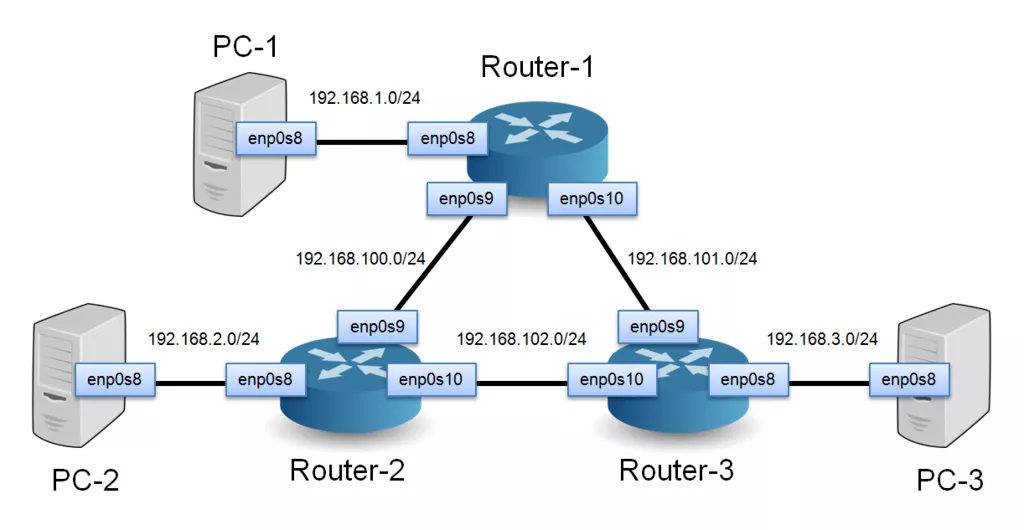


<b>Enable port forwarding through VirtualBox, to allow ssh into each router from your host machine</b>

In VirtualBox:
    
    Right click on the vm in the left banner and choose "Settings... Ctrl+S"
    
    Choose "Network" from the menu in the left hand banner.
    
    Click on "Adapter 1" 
    
    Verify the adapter says, "Attach to: NAT"
    
    Under "Advanced," click on "port forwarding."
    
    For router 1:
        protocol: ssh
        Host Port: 14601
        Guest Port: 22

    Repeat this process for router2 and router3, changing the host port to 14602 and 14603, respectively. 
        
<b>Headless start all three routers</b>

In VirtualBox:
    Right click on "Start" and choose "Headless Start"
    
<b>ssh into routers from host machine</b>

In the command line, use the formula

ssh -l [user] -p [Host Port] localhost

It should look something like: 

ssh -l jane -p 14601 localhost
    

### Router 1 

<b>Type the following commands once you are in the vtysh shell:</b>
```
configure terminal
hostname router1
router ospf
 network 192.168.1.0/24 area 0
 network 192.168.100.0/24 area 0 
 network 192.168.101.0/24 area 0 
 passive-interface enp0s8    
 exit
interface enp0s8
 ip address 192.168.1.254/24
 exit
interface enp0s9
 ip address 192.168.100.1/24
 exit
interface enp0s10
 ip address 192.168.101.2/24
 exit
ip forwarding
exit
write
exit
```

### Router 2 

Type the following commands once you are in the vtysh shell:
```
configure terminal
hostname router2
router ospf
 network 192.168.1.0/24 area 0.0.0.0
 network 192.168.100.0/24 area 0.0.0.0
 network 192.168.102.0/24 area 0.0.0.0
 passive-interface enp0s8    
 exit
interface enp0s8
 ip address 192.168.2.254/24
 exit
interface enp0s9
 ip address 192.168.100.1/24
 exit
interface enp0s10
 ip address 192.168.101.2/24
 exit
ip forwarding
exit
write
exit
```

### Router 3 

Type the following commands once you are in the vtysh shell:
```
configure terminal
hostname router2
router ospf
 network 192.168.3.0/24 area 0.0.0.0
 network 192.168.101.0/24 area 0.0.0.0
 network 192.168.102.0/24 area 0.0.0.0
 passive-interface enp0s8    
 exit
interface enp0s8
 ip address 192.168.3.254/24
 exit
interface enp0s9
 ip address 192.168.101.2/24
 exit
interface enp0s10
 ip address 192.168.102.2/24
 exit
ip forwarding
exit
write
exit
```

Note: If you type the wrong ip address in an interface here are the commands to delete it, starting from the vtysh command:
```
vtysh
configure terminal
 interface [interface]
 no ip address [ip address]
 exit
exit
write
```
[Here is a (perhaps) better example](https://lists.quagga.net/pipermail/quagga-users/2013-July/013365.html)

## <center> Phase 5 - Add the PC's <center>

<b>Clone Ubuntu Desktop 16.04 Base three separate times</b>
In VirtualBox:
Right click on ubuntu-desktop-16.04-base and choose "Clone... Ctrl+O"
Name the new machine "pc1" 
Place check in box next to "Reinitialize the MAC address of all network cards"
Click "Next"
On the following page, choose "Linked Clone" 
Then, click clone. 

<b>Repeat this process for pc2 and pc3.</b>

<b>Enable the network settings </b>

 pc1
    
    In VirtualBox:
    
    right click on pc1 and choose "Settings... Ctrl+S"
    
    Choose "Network" from the menu in the left hand banner.

    Click on "Adapter 2", place a check next to "Enable Network Adapter" 
    
    Attach to: Internal Network
    
    Name: 192.168.1.0

 pc2
    
    In VirtualBox:
    
    right click on pc2 and choose "Settings... Ctrl+S"
    
    Choose "Network" from the menu in the left hand banner.

    
    Click on "Adapter 2", place a check next to "Enable Network Adapter" 
    
    Attach to: Internal Network
    
    Name: 192.168.2.0

 pc3
    
    In VirtualBox:
    
    right click on pc3 and choose "Settings... Ctrl+S"
    
    Choose "Network" from the menu in the left hand banner.

    Click on "Adapter 2", place a check next to "Enable Network Adapter" 
    
    Attach to: Internal Network
    
    Name: 192.168.3.0

## <center> Phase 6 - Configure PC onto network <center>

<b>Enable port forwarding through VirtualBox, to allow ssh into each pc from your host machine</b>

In VirtualBox:
    
    Right click on the vm in the left banner and choose "Settings... Ctrl+S"
    
    Choose "Network" from the menu in the left hand banner.
    
    Click on "Adapter 1" 
    
    Verify the adapter says, "Attach to: NAT"
    
    Under "Advanced," click on "port forwarding."
    
    For router 1:
        protocol: ssh
        Host Port: 14501
        Guest Port: 22

    Repeat this process for router2 and router3, changing the host port to 14502 and 14503, respectively. 
        
<b>Headless start all three pc</b>

In VirtualBox:
    Right click on "Start" and choose "Headless Start"
    
<b>ssh into routers from host machine</b>

In the command line, use the formula

ssh -l [user] -p [Host Port] localhost

It should look something like: 

ssh -l tom -p 14501 localhost

<b>log on</b>

<b>Change the host to pc1,2 or 3</b>
```
sudo nano /etc/hosts
```
<b>Change the hostname to pc1,2, or 3. </b>

```
sudo nano /etc/hostname
```
<b>Restart the computer so the changes are reflected.</b>
```
shutdown -r 0
```

<b>Log back onto the computer.</b>

<b>Add the interface configuration to the network interfaces file and set up a static route.</b>

pc1
```
auto enp0s8
iface enp0s8 inet static
   address 192.168.1.1
   netmask 255.255.255.0
up route add -net 192.168.0.0/16 gw 192.168.1.254 dev enp0s8
```
pc2
```
auto enp0s8
iface enp0s8 inet static
   address 192.168.2.1
   netmask 255.255.255.0
up route add -net 192.168.0.0/16 gw 192.168.2.254 dev enp0s8
```
pc3
```
auto enp0s8
iface enp0s8 inet static
   address 192.168.3.1
   netmask 255.255.255.0
up route add -net 192.168.0.0/16 gw 192.168.3.254 dev enp0s8
```


## <center> Phase 7 - Customize <center>

This concludes construction of the basic laboratory. Depending upon the processing power of your host machine many more vm can be added to customize the environment. For instance, a web server, DNS server, file server and other devices such as printers or fax machines could be added to make the lab more hackable. 

Multiple operating systems could be added to the networks, as well. Windows 7, 8 and 10, as well as Kali Linux and metasploitable could be integrated. Once customized, the lab should offer endless hours of hacker enjoyment. So go forth... have fun... and let me know what you accomplish!  